# Заметка
📘 Теория как для своих:

❓Что такое TensorFlow вообще?
Это такая библиотека от Google, чтобы строить и тренировать нейросети. Она работает быстро, использует GPU и умеет:

1.делать математику с тензорами (массивы чисел),
2.обучать модели,
3.строить нейросети (даже сложные),
4.запускать на сервере, телефоне или браузере.
Представь: ты строишь сетку → кормишь её данными → она учится → начинает делать предсказания (например, "на фотке кошка или собака?").

🧠 А что такое тензор?
Тензор — это просто массив чисел.
Типа:

1.число → tf.constant(5) — скаляр
2.список → [1, 2, 3] — вектор (1D)
3.таблица → [[1, 2], [3, 4]] — матрица (2D)
4.куча картинок → 4D массив (тип batch, height, width, channels)
TensorFlow = работа с этими тензорами, обновление весов, градиенты, обучение. Всё вокруг этого.

In [4]:
!pip install tensorflow

186.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [170]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print(tf.__version__)
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

2.19.0


In [4]:
x = tf.constant([[1,2],[3,4]]) #constant создает неизменяемый тензор то есть массив чисел(коробку)
y = tf.constant([[5,6],[7,8]])

z = tf.add(x,y) # add складывает значения

print("x:\n",x.numpy())# numpy используется чтобы результат был как нумпай массив чтобы более понятно было
print("y:\n",y.numpy())
print("z = x + y:\n ",z.numpy())

x:
 [[1 2]
 [3 4]]
y:
 [[5 6]
 [7 8]]
z = x + y:
  [[ 6  8]
 [10 12]]


In [6]:
x1 = tf.constant([[1,2],[3,4],[5,6]])
y1 = tf.constant([[7,8],[9,10],[11,12]])

z1 = tf.multiply(x1,y1) #multuply это умножение и subtract вычитание 
a1 = tf.subtract(y1,x1)

print("z = x*y:\n",z1.numpy())
print("a = y-a:\n",a1.numpy())

z = x*y:
 [[ 7 16]
 [27 40]
 [55 72]]
a = y-a:
 [[6 6]
 [6 6]
 [6 6]]


# Заметка 
📘 Теория: Что такое tf.Variable

tf.Variable — это тензор, который можно менять.
Он нужен для весов и смещений в нейросетке.
Когда модель учится, она обновляет переменные, а не константы.

In [9]:
v = tf.Variable([[1.0],[2.0],[3.0]]) # Veriable создает изменяем тензор то есть массив чисел(коробку) которую можно изменить
print("Без изменений:\n",v.numpy())
v.assign([[20.0],[30.0],[40.0]]) # assign можно изменять тензор и давать новые значения
print("Изменения:\n",v.numpy())

Без изменений:
 [[1.]
 [2.]
 [3.]]
Изменения:
 [[20.]
 [30.]
 [40.]]


# Заметка
 Сейчас ты своими глазами увидишь основу обучения нейросетей — то, как TensorFlow сам обновляет переменную, чтобы уменьшить ошибку. Это и есть 🔥градиентный спуск.

📌 Цель:

Научить переменную x приближаться к минимуму функции

Пример:
📉 y = x²
Минимум у неё при x = 0, ведь 0² = 0 — меньше некуда.

In [12]:
x = tf.Variable(5.0)           # переменная, которую учим
learning_rate = 0.1            # шаг обучения

for step in range(20):
    with tf.GradientTape() as tape:
        tape.watch(x)          # показываем что tape следил за x
        y = x ** 2             # внутри tape, чтобы считать градиент
    grad = tape.gradient(y, x)  # считаем производную y по x
    x.assign_sub(learning_rate * grad)  # двигаем x
    print(f"Шаг {step+1}: x = {x.numpy():.4f}, y = {y.numpy():.4f}, grad = {grad.numpy():.4f}")

Шаг 1: x = 4.0000, y = 25.0000, grad = 10.0000
Шаг 2: x = 3.2000, y = 16.0000, grad = 8.0000
Шаг 3: x = 2.5600, y = 10.2400, grad = 6.4000
Шаг 4: x = 2.0480, y = 6.5536, grad = 5.1200
Шаг 5: x = 1.6384, y = 4.1943, grad = 4.0960
Шаг 6: x = 1.3107, y = 2.6844, grad = 3.2768
Шаг 7: x = 1.0486, y = 1.7180, grad = 2.6214
Шаг 8: x = 0.8389, y = 1.0995, grad = 2.0972
Шаг 9: x = 0.6711, y = 0.7037, grad = 1.6777
Шаг 10: x = 0.5369, y = 0.4504, grad = 1.3422
Шаг 11: x = 0.4295, y = 0.2882, grad = 1.0737
Шаг 12: x = 0.3436, y = 0.1845, grad = 0.8590
Шаг 13: x = 0.2749, y = 0.1181, grad = 0.6872
Шаг 14: x = 0.2199, y = 0.0756, grad = 0.5498
Шаг 15: x = 0.1759, y = 0.0484, grad = 0.4398
Шаг 16: x = 0.1407, y = 0.0309, grad = 0.3518
Шаг 17: x = 0.1126, y = 0.0198, grad = 0.2815
Шаг 18: x = 0.0901, y = 0.0127, grad = 0.2252
Шаг 19: x = 0.0721, y = 0.0081, grad = 0.1801
Шаг 20: x = 0.0576, y = 0.0052, grad = 0.1441


In [14]:
# 1. Данные
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0], dtype=np.float32) # x — входные данные, типа: "вот такие у нас условия" дали тип float32
y = np.array([-1.0, 1.0, 3.0, 5.0, 7.0], dtype=np.float32) # y — правильные ответы, что должно получиться дали тип float32

# 2. Создание модели
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])  # layers.Dense это слои(фильтр для данных через что должны пройти данные) 
])                                                   # units=1, input_shape=[1] = 1 нейрон, 1 вход

# 3. Компиляция модели (настройка обучения)
model.compile(optimizer='sgd', loss='mean_squared_error') # compile — это как "собрать модель перед запуском"
                                                          # optimizer='sgd' — метод обучения (SGD = градиентный спуск)
                                                          # loss='mean_squared_error' — ошибка, которую сеть будет пытаться уменьшить
                                                        
model.fit(x, y, epochs=500, verbose=0)  # epochs=500 — повторить обучение 500 раз (это много — чтобы хорошо выучилось)
                                        # verbose=0 — не показывать прогресс (можно поставить 1, если хочешь видеть)

# 5. Предсказание
print("Предсказание для x = 10:", model.predict(np.array([12.0])))

weights = model.layers[0].get_weights() # Нужно чтобы увидеть результат того что поняла нейросеть
print("Вес (w):", weights[0])
print("Смещение (b):", weights[1])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Предсказание для x = 10: [[22.803507]]
Вес (w): [[1.9785235]]
Смещение (b): [-0.93877524]


In [15]:
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0], dtype=np.float32)
y = np.array([-1.0, 1.0, 3.0, 5.0, 7.0], dtype=np.float32) 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 10,activation="relu",input_shape = [1]), # есть 3 самых популярных активаций relu,sigmoid,tanh
    tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer="sgd",loss = "mean_squared_error")

model.fit(x,y,epochs=500,verbose=0)

print("Предсказания для X",model.predict(np.array([10.0])))

for i,layers in enumerate(model.layers):
    weights = layers.get_weights()
    print(f"\nСлои {i+1}:")
    print("Вес:",weights[0])
    print("Смещение",weights[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Предсказания для X [[19.198992]]

Слои 1:
Вес: [[ 0.10862718  1.1405591   1.0600415  -0.6904518  -0.56925845 -0.2383979
   0.31304297 -0.10722005 -0.0122007  -0.0791139 ]]
Смещение [-0.04194933 -0.14638886 -0.12112035  0.          0.          0.
 -0.04364608  0.         -0.04310628  0.        ]

Слои 2:
Вес: [[-0.30465084]
 [ 1.0490621 ]
 [ 0.8216023 ]
 [-0.717082  ]
 [ 0.3314578 ]
 [ 0.42508548]
 [-0.01879931]
 [ 0.57333106]
 [-0.5588306 ]
 [ 0.41918153]]
Смещение [-0.84624165]


In [16]:
x = np.array([20, 25, 30, 35, 40, 45], dtype=np.float32)  # возраст
y = np.array([0, 0, 0, 1, 1, 1], dtype=np.float32)  # результат болен или не болен

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 5,activation="relu",input_shape = [1]),
    tf.keras.layers.Dense(units = 1,activation = "sigmoid",input_shape = [1])
])

model.compile(optimizer="adam",loss = "binary_crossentropy",metrics=["accuracy"])

model.fit(x,y,epochs=500,verbose=0)

pred = model.predict(np.array([28, 38, 50]))

print("Предсказание",pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Предсказание [[0.5607758 ]
 [0.6409775 ]
 [0.72749823]]


In [17]:
texts = ["Очень хорошо", "Прекрасно", "Ненавижу это", "Отвратительно", "Круто", "Это плохо","Ужасно"]
labels = [1, 1, 0, 0, 1, 0,0]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)                                     # fit_on_texts(...) — создает словарь: ?
sequences = tokenizer.texts_to_sequences(texts)                   # texts_to_sequences(...) — превращает фразы в списки чисел

x = pad_sequences(sequences)                                      # pad_sequences удленняет список если 
y = np.array(labels)                                              #например слово очень ххорошо и прекрасно то будет [1,5],[0,5]


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=100,output_dim=8),        # Превращает число-слово в вектор (смысл)
    tf.keras.layers.Flatten(),                                    # Делает все в 1 строку, чтобы можно было подать дальше
    tf.keras.layers.Dense(1,activation="sigmoid")                 # Один нейрон с sigmoid: выдает вероятность, что это хороший отзыв
])

model.compile(optimizer="adam",loss = "binary_crossentropy",metrics=["accuracy"])
model.fit(x,y,epochs=500,verbose=0)

new_texts = ["Прекрасно", "Это плохо", "Просто ужас", "Очень круто"]
new_seq = tokenizer.texts_to_sequences(new_texts)
new_pad = pad_sequences(new_seq,maxlen=x.shape[1])                 #превращает новые фразы в одинаково длинные списки чисел 
pred = model.predict(new_pad)                                      #чтобы их можно было отправить в модель без ошибки.

print("Предсказание\n",pred)
print("0 или 1:\n",(pred>0.5).astype(int))                        # (pred > 0.5).astype(int) → превращаем в чёткие 0 или 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Предсказание
 [[0.937552  ]
 [0.02603118]
 [0.47961092]
 [0.98626256]]
0 или 1:
 [[1]
 [0]
 [0]
 [1]]


# Земтка 
## 🔥 Часть 2: LSTM + Dropout

Что такое LSTM?
Это слой, который помнит порядок слов

"Очень плохо" ≠ "Плохо очень" — для Dense одинаково, а для LSTM — разный смысл.

In [128]:
texts1= ["Очень хорошо", "Прекрасно", "Ненавижу это", "Отвратительно", "Круто", "Это плохо", "Ужасно"]
labels1= [1, 1, 0, 0, 1, 0, 0]

tokenizer = Tokenizer() 
tokenizer.fit_on_texts(texts1)                     # создаем словарь
sequences = tokenizer.texts_to_sequences(texts1)   # токенизируем слова

x = pad_sequences(sequences)                       # Удленяем токенезированные слова из входных данных x
y = np.array(labels1)                              # Создаем массив из выходных данных y

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=100, output_dim=8), # Превращает число-слово в вектор
    tf.keras.layers.LSTM(16),                      # LSTM — чувствует порядок слов "понимает контекст”
    tf.keras.layers.Dropout(0.2),                  # Dropout — выключает 20% нейронов для устойчивости 
                                                   # делает модель устойчивее (не переучивается
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam",loss = "binary_crossentropy",metrics=["accuracy"]) # собираем модель
model.fit(x, y, epochs=200, verbose=0) # обучаем модель 

new_text = ["Прекрасно", "Это плохо", "Очень ужасно", "Не очень хорошо", "Ничего"]
new_seq = tokenizer.texts_to_sequences(new_text)
new_pad = pad_sequences(new_seq,maxlen=x.shape[1])
pred = model.predict(new_pad)

print("Предсказание:\n",pred)
print("0 или 1:\n",(pred > 0.5).astype(int))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Предсказание:
 [[0.74460554]
 [0.00978292]
 [0.52120346]
 [0.82811093]
 [0.4476014 ]]
0 или 1:
 [[1]
 [0]
 [1]
 [1]
 [0]]


In [172]:
# 🧪 Загружаем датасет диабета
data = load_breast_cancer()
X = data.data
Y = data.target

In [174]:
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size=0.2,random_state = 0
)

In [176]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [214]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation="relu",input_shape = (X.shape[1],)),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

In [224]:
model.compile(optimizer="adam",loss = "binary_crossentropy",metrics=["accuracy"])

In [226]:
history = model.fit(X_train,Y_train, epochs=50,batch_size=16,validation_data=(X_test,Y_test),verbose=0)

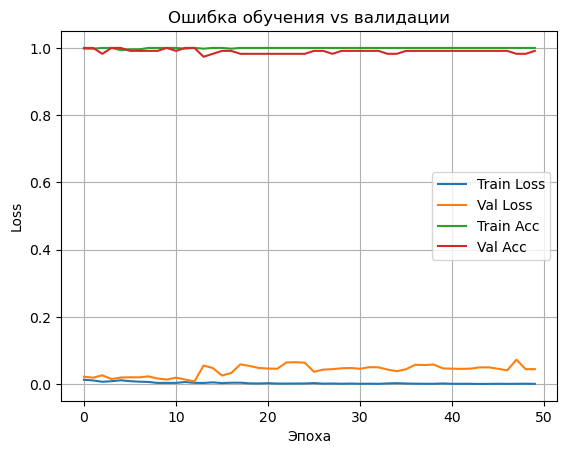

In [227]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Ошибка обучения vs валидации")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()
